**Introduction**
1. **Title**

Design and Implementation of a Mobile Money Fraud Detection System Using AI and Data Science in Python

2. **Problem Statement**

Mobile money services (like MTN MoMo, Orange Money, etc.) have revolutionized financial transactions by making payments and money transfers fast, convenient, and accessible. However, with the rapid growth of mobile financial services, fraudulent activities have also increased. Examples include:

Unauthorized transfers

Account takeovers

Suspicious or high-value transactions without user consent

These fraudulent activities cause financial losses to both customers and service providers, damage trust, and pose significant operational challenges.

Currently, detecting such fraud often relies on manual monitoring or basic rule-based systems, which are inefficient and cannot scale to the millions of daily transactions.

**Problem:** There is a need for an automated, intelligent system that can detect potentially fraudulent transactions in real time using data-driven approaches, combining AI and Data Science techniques.

3. **Why This Problem Was Chosen**

**Real-World Relevance:** Mobile money fraud is a growing problem worldwide, especially in countries with high adoption of mobile money services. Solving it has direct societal and financial impact.

**AI Application:** Fraud detection is a classic and widely recognized real-world use case for AI and Data Science, making it ideal for learning and applying all core course concepts: data preprocessing, algorithms, ML modeling, visualization, and testing.

**Data Availability:** Publicly available datasets (like the PaySim dataset) allow students to simulate a realistic fraud detection scenario without accessing sensitive real-world banking data.

**Complexity:** The problem introduces common challenges such as:

Highly imbalanced datasets (few fraud cases compared to normal transactions)

Mixed data types (numerical, categorical, IDs)

The need for custom algorithms and structured pipelines

4. **Dataset**
Name: momo-fraud-detection-dataset.csv

Source / Link:

You can download it from Kaggle:
https://www.kaggle.com/datasets/ealaxi/paysim1/data

**Description:**

The dataset is a synthetic simulation of mobile money transactions using the PaySim simulator.

It represents typical mobile money operations over a simulated period, including legitimate and fraudulent transactions.

.........................................................................................

**In this project, we aim to design and implement an AI-powered fraud detection system using this dataset. The system will:**

Load and preprocess transaction data

Apply a custom fraud risk scoring algorithm

Train a machine learning classifier to predict fraud

Visualize patterns and model performance

Be modular, tested, and version-controlled

This setup simulates a real-world data science pipeline, integrating all major course concepts.

.........................................................................................

**EDA - EXPLORATORY DATA ANALYSIS**

In [ ]:
#importing various libraries
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For better plot style
sns.set(style="whitegrid")


In [3]:
# Load the dataset
data_path = "momo-fraud-detection-dataset.csv"
df = pd.read_csv(data_path)

# Display first 5 rows
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
#getting dataset characteristics

print("Dataset shape:", df.shape)
df.info()
# Summary statistics for numerical columns
df.describe()


Dataset shape: (6362620, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
#identifying missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


**TARGET VARIABLE (FRAUD) ANALYSIS**

isFraud
0    6354407
1       8213
Name: count, dtype: int64
isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64


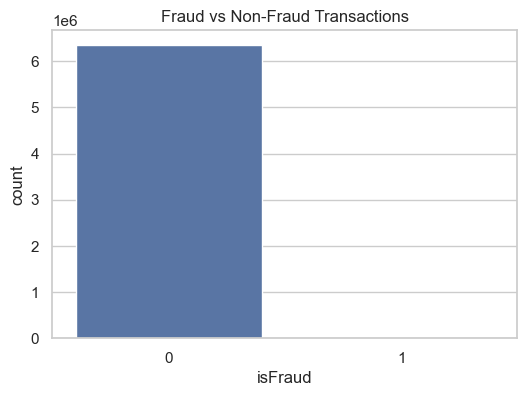

In [6]:
# Count of fraud vs non-fraud
fraud_counts = df['isFraud'].value_counts()
print(fraud_counts)

# Percentage
fraud_percent = df['isFraud'].value_counts(normalize=True) * 100
print(fraud_percent)

# Plot
plt.figure(figsize=(6,4))
sns.countplot(x='isFraud', data=df)
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()


**Observation:**

Fraud transactions are usually very rare **(~0.1–0.2%)**

This confirms imbalanced data, which is a challenge for ML models

When your dataset is imbalanced, ML models tend to ignore the rare class (fraud) and just predict “normal” for almost everything, which gives high accuracy but the prediction is not accurate.

**TRANSACTION TYPE ANALYSIS**


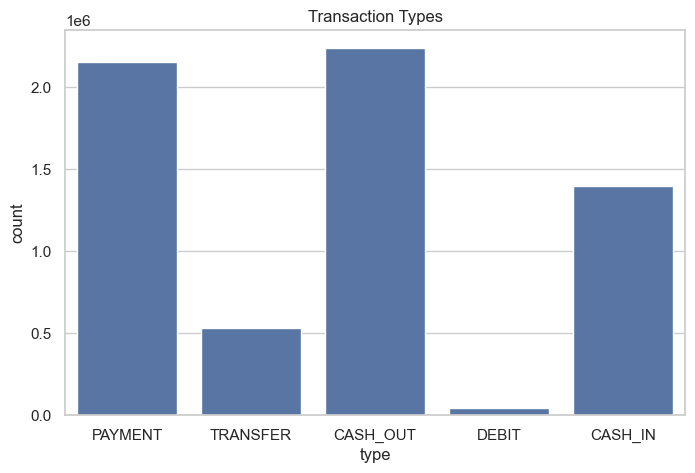

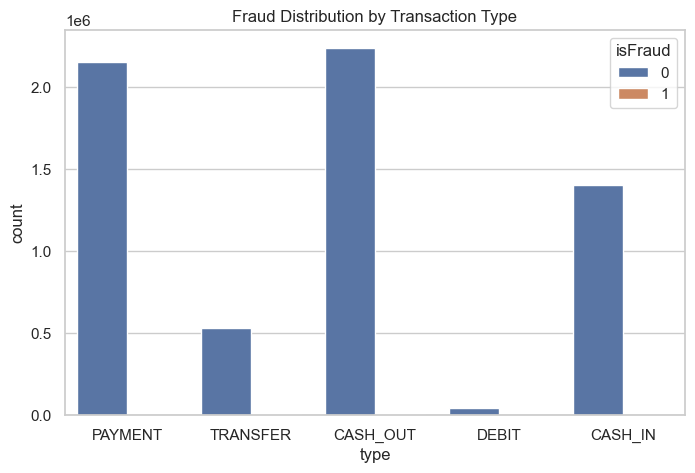

In [7]:
# Count of each transaction type
plt.figure(figsize=(8,5))
sns.countplot(x='type', data=df)
plt.title('Transaction Types')
plt.show()

# Fraud distribution by type
plt.figure(figsize=(8,5))
sns.countplot(x='type', hue='isFraud', data=df)
plt.title('Fraud Distribution by Transaction Type')
plt.show()


**Observation:**

Most fraud occurs in TRANSFER and CASH_OUT types

PAYMENT, DEBIT, and CASH_IN are mostly normal transactions

**TRANSACTION AMOUNT DISTRIBUTION**

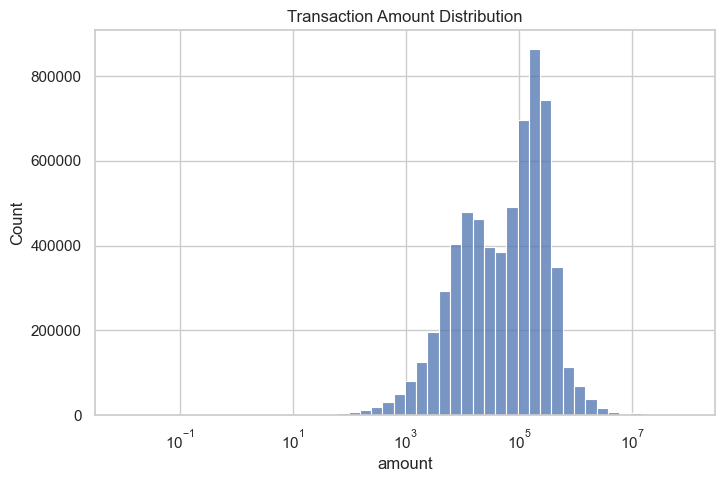

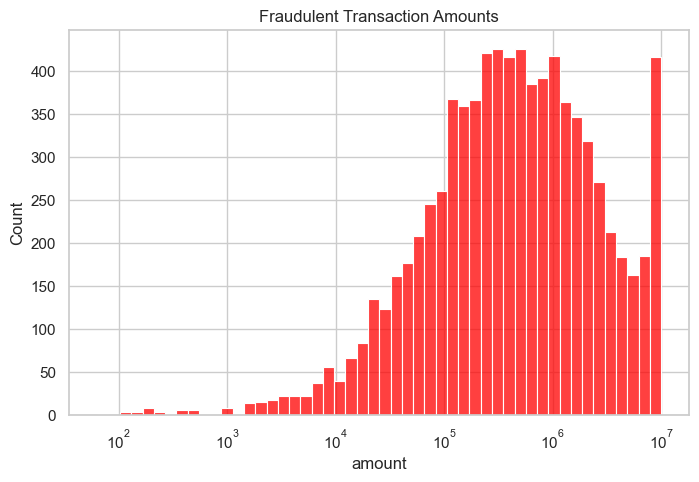

In [10]:
# Transaction amounts (log scale for better visualization)
plt.figure(figsize=(8,5))
sns.histplot(df['amount'], bins=50, log_scale=True)
plt.title('Transaction Amount Distribution')
plt.show()

# Fraudulent amounts only
plt.figure(figsize=(8,5))
sns.histplot(df[df['isFraud']==1]['amount'], bins=50, log_scale=True, color='red')
plt.title('Fraudulent Transaction Amounts')
plt.show()


**Observation:**

Fraud transactions tend to be higher amounts, but not always

Using risk scoring on amount + type can help flag fraud

**BALANCE ANALYSIS**

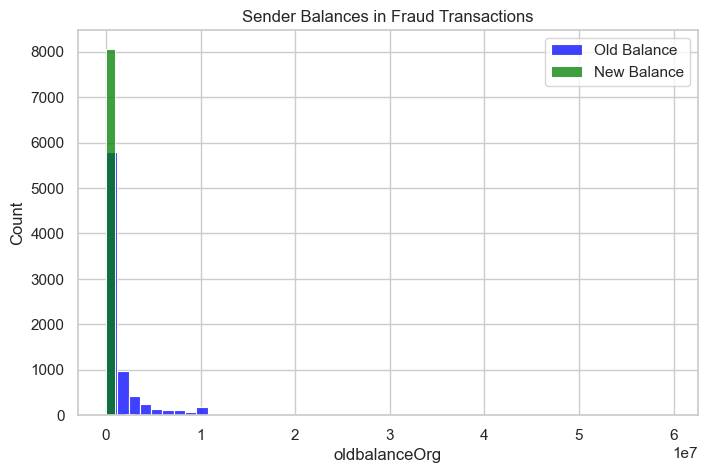

In [8]:
# Compare sender old balance vs new balance for fraud transactions
fraud_transactions = df[df['isFraud']==1]

plt.figure(figsize=(8,5))
sns.histplot(fraud_transactions['oldbalanceOrg'], bins=50, color='blue', label='Old Balance')
sns.histplot(fraud_transactions['newbalanceOrig'], bins=50, color='green', label='New Balance')
plt.legend()
plt.title('Sender Balances in Fraud Transactions')
plt.show()


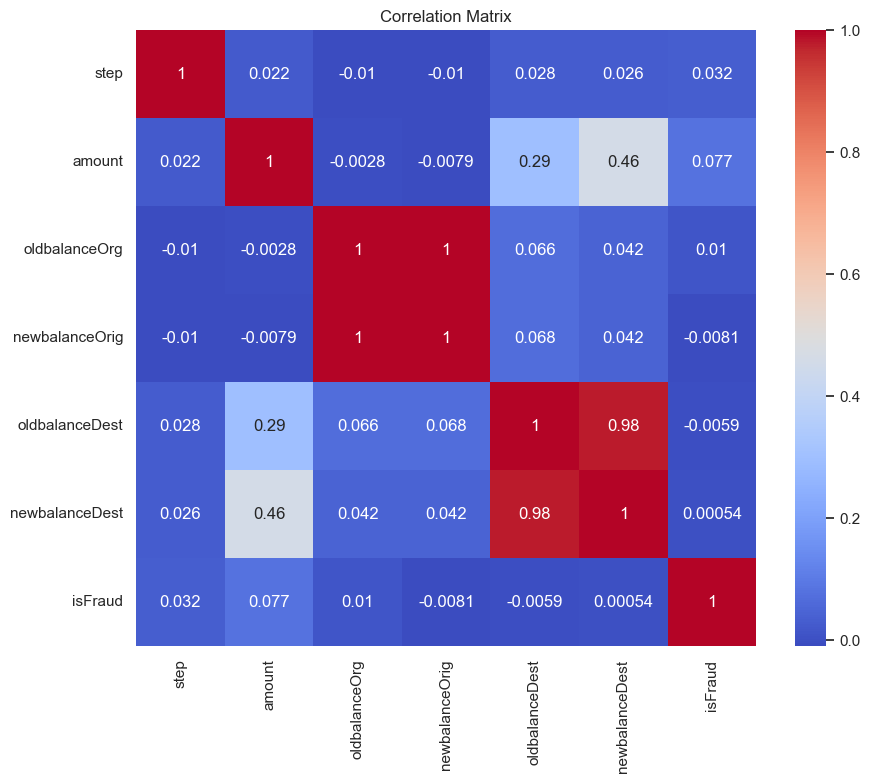

In [9]:
# Correlation matrix (numerical columns only)
plt.figure(figsize=(10,8))
numerical_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**Observation:**

amount and isFraud often weakly correlated

oldbalanceOrg and newbalanceOrig may indicate fraud patterns

Confirms need for ML + custom scoring

**Summary of EDA**

Fraud is rare → dataset is imbalanced

Fraud mostly occurs in TRANSFER and CASH_OUT

Fraud often involves high amounts and zero sender balances

Data is clean, no missing values

**Strong justification for:**

Custom risk scoring algorithm

ML classification model

Feature selection & scaling

...........................................................................................

**HANDLING DATASET IMBALANCE (SMOTE)**

synthetic minority oversampling technique (SMOTE)

In [11]:
# Features and target
X = df_risk.drop(['isFraud', 'isHighRisk', 'nameOrig','nameDest'], axis=1)  # Drop IDs & target
y = df_risk['isFraud']

# Split into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE to training set
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Original fraud samples in train:", y_train.sum())
print("Resampled fraud samples in train:", y_train_res.sum())


NameError: name 'df_risk' is not defined